 # **Formação Cientista de Dados**
## Limpeza e tratamento de dados 

In [1]:
# Importação das Libs
import pandas as pd 
import seaborn as srn 
import statistics as sts 

In [2]:
# importar dados 
dataset = pd.read_csv('Churn.csv', sep=';')
# visualizar 
dataset.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [3]:
# tamanho
dataset.shape

(999, 12)

In [4]:
# primeiro problema é dar nomes as colunas 
dataset.columns = [
    'Id','Score','Estado','Genero','Idade','Patrimonio','Saldo','Produtos',
    'TemCartCredito','Ativo','Salario','Saiu'
]

In [5]:
# visualizar
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [6]:
# explorar dados categóricos
# estado 
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

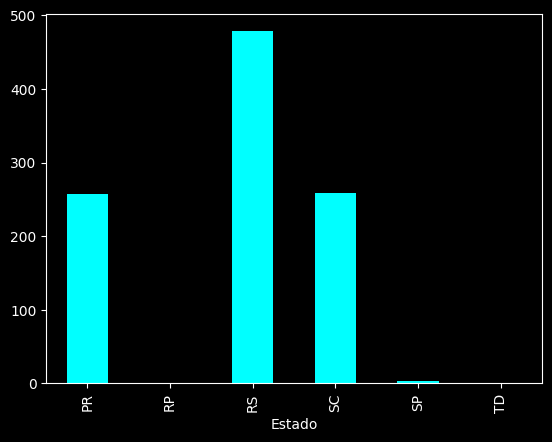

In [7]:
# Visualizando o Gráfico
agrupado.plot.bar(color='cyan');

In [8]:
# gênero 
agrupado =dataset.groupby(['Genero']).size()
agrupado

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

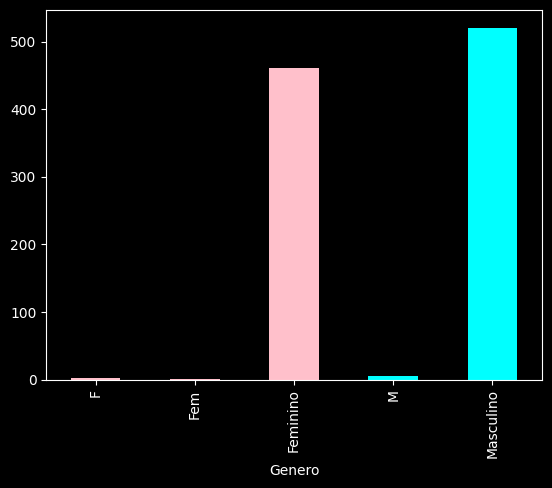

In [9]:
# Visualizando o Gráfico de gênero
agrupado.plot.bar(color=[ 'Pink', 'Pink', 'Pink','Cyan','Cyan']);

In [10]:
# explorar colunas numéricas
# score 
dataset['Score'].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

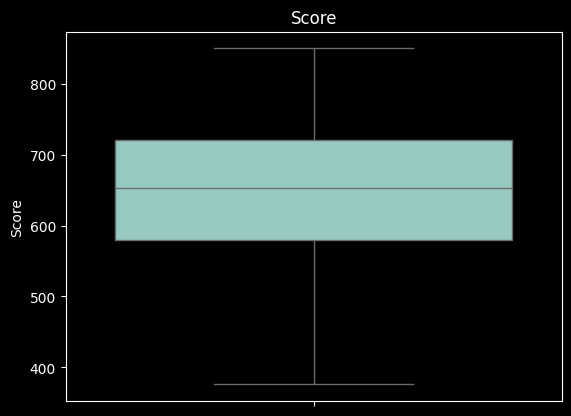

In [11]:
# Visualizando o Gráfico
srn.boxplot(dataset['Score']).set_title('Score');

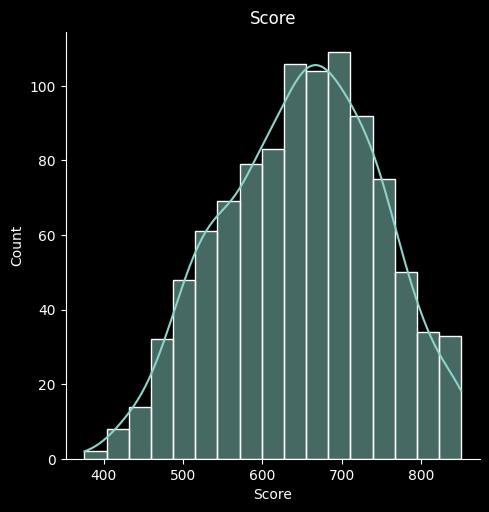

In [12]:
# Visualizando o Gráfico
graph = srn.displot(dataset['Score'], kde=True)
graph.set(title='Score');

In [13]:
# idade 
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

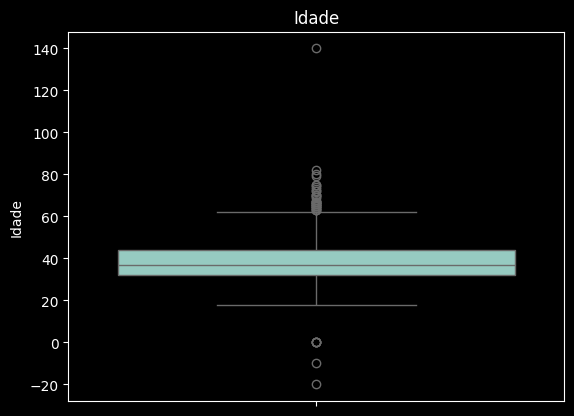

In [14]:
# Visualizando o Boxplot de Idade
srn.boxplot(dataset['Idade']).set_title('Idade');

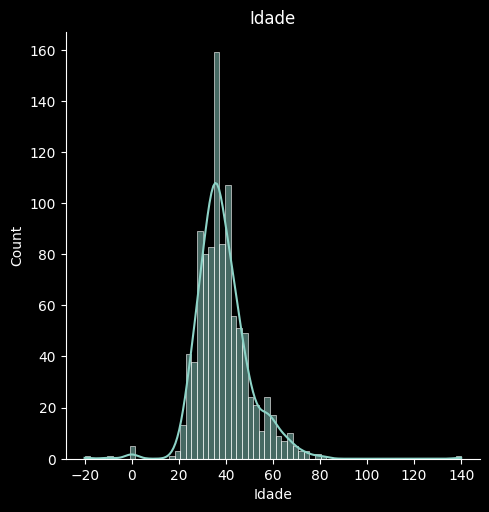

In [15]:
# Visualizando o Gráfico de dispersão
graph = srn.displot(dataset['Idade'], kde=True)
graph.set(title='Idade');

In [16]:
# Saldo 
dataset['Saldo'].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

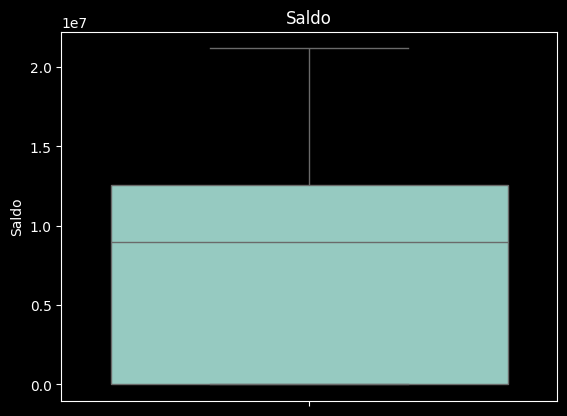

In [17]:
#  Visualizando o Boxplot de Saldo
srn.boxplot(dataset['Saldo']).set_title('Saldo');

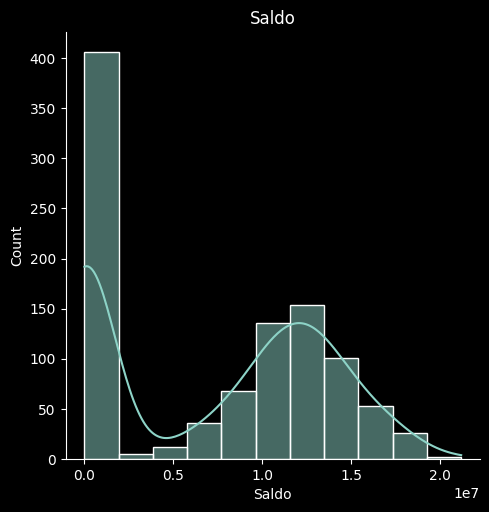

In [18]:
# Visualizando o Gráfico de dispersão
graph = srn.displot(dataset['Saldo'], kde=True)
graph.set(title='Saldo');

In [19]:
# Salario 
dataset['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

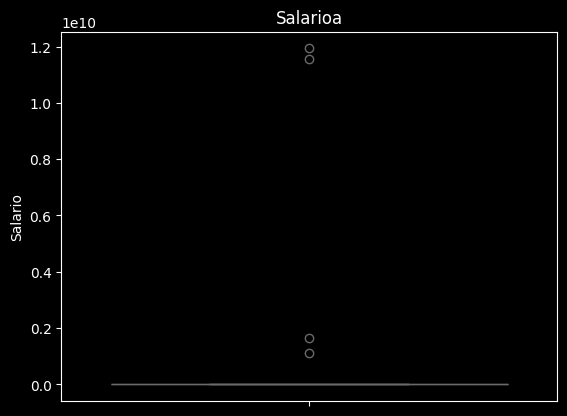

In [20]:
# Visualizando o Boxplot de Salario
srn.boxplot(dataset['Salario']).set_title('Salarioa');

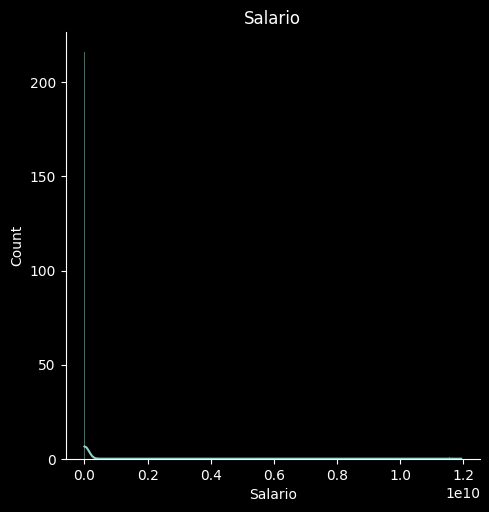

In [21]:
# Visualizando o Gráfico de dispersão
graph = srn.displot(dataset['Salario'], kde=True)
graph.set(title='Salario');

In [22]:
# Contamos valores NAN 
# Genero e Salário 
dataset.isnull().sum()

Id                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           7
Saiu              0
dtype: int64

In [23]:
# salario 
# removendo NAs e substituir pela mediana
dataset['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

In [24]:
# Calculando a mediana
mediana = sts.median(dataset['Salario'])
mediana 

70518.0

In [25]:
#substituir NAN por mediana
dataset['Salario'].fillna(mediana, inplace=True)

In [26]:
# Verificamos se NAN não existem mais 
dataset['Salario'].isnull().sum()

0

In [27]:
# genero, falta de padronização e NAs
agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [28]:
# total de NAs
dataset['Genero'].isnull().sum()

8

In [29]:
# preenche NAs com Masculino (Moda)
dataset['Genero'].fillna('Masculino', inplace=True)

In [30]:
# verificamos novamente NAs
dataset['Genero'].isnull().sum()

0

In [31]:
# Padroniza de acordo com o domínio 
dataset.loc[dataset['Genero'] == 'M', 'Genero'] = 'Masculino'
dataset.loc[dataset['Genero'].isin(['Fem','F']), 'Genero'] = 'Feminino'
# Visualizar o resultado
agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
Feminino     464
Masculino    535
dtype: int64

In [32]:
# Idade fora do domínio
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

In [33]:
# Visualizar
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 120)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


In [34]:
# Calcular a mediana 
mediana = sts.median(dataset['Idade'])  
mediana

37

In [35]:
# substituir
dataset.loc[
    (dataset['Idade'] < 0) | (dataset['Idade'] > 120), 'Idade'
] = mediana

In [36]:
# verificamos se ainda existem idade fora do domínio
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 120)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [37]:
# dados duplicados, buscamos pelo ID
dataset[dataset.duplicated(['Id'], keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [38]:
# Excluído pelo Id 
dataset.drop_duplicates(subset='Id', keep='first', inplace=True)
#buscamos duplicados
dataset[dataset.duplicated(['Id'],keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [39]:
# estado foram do domínio
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RP      1
RS    477
SC    258
SP      4
TD      1
dtype: int64

In [40]:
# atribuímos RS (moda)
dataset.loc[dataset['Estado'].isin(['RP','SP','TD']), 'Estado'] = 'RS'
agrupado = dataset.groupby(['Estado']).size()
# verificamos o resultado
agrupado

Estado
PR    257
RS    483
SC    258
dtype: int64

In [41]:
# outliers em salario, vamos considerar 2 desvios padrão
desv = sts.stdev(dataset['Salario'])
desv

528988918.4679201

In [42]:
# definir padrão como maior que 2 desvios padrão
# checamos se algum atende critério
dataset.loc[dataset['Salario'] >= 2 * desv]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [43]:
# vamos atualizar salários para mediana, calculamos 
mediana = sts.median(dataset['Salario'])
mediana

8637195.5

In [44]:
# atribuímos
dataset.loc[dataset['Salario'] >= 2 * desv, 'Salario'] = mediana
# checamos se algum atende critério
dataset.loc[dataset['Salario'] >= 2 * desv]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [45]:
# Visualizando o DataSet
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [46]:
# Verificamos o tamanho
dataset.shape

(998, 12)

In [ ]:
# Exportado a base de dado Tratada
dataset.to_csv('churn.csv', index=False)